In [ ]:
!pip install scikit-plot
!pip install imblearn

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('../Database/DB_v1.csv',index_col=False)
df=df.drop(['Unnamed: 0'],axis=1)
y=df['DEF_PAY']
X=df.drop(['DEF_PAY'],axis=1)

In [20]:
def experimentar_normal(model,X,Y,oversampling=False):

    Folds = 5
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X.iloc[train]
        Ytrain = Y.iloc[train]
        Xtest = X.iloc[test]
        Ytest = Y.iloc[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

def experimentar_pca(model,X,Y,oversampling=False):

    Folds = 5
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for train, test in skf.split(X, Y):
        Xtrain= X.iloc[train]
        Ytrain = Y.iloc[train]
        Xtest = X.iloc[test]
        Ytest = Y.iloc[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        pca = PCA(n_components= 18)
        X_train_pca = pca.fit_transform(X= Xtrain)
        X_test_pca = pca.transform(X= Xtest)
        
        model.fit(X=X_train_pca, y=Ytrain)
        Yest = model.predict_proba(X_test_pca)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

def experimentar_feature_sel(model,X,Y,features,oversampling=False):
    
    X=X.iloc[:,features]
    Folds = 5
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X.iloc[train]
        Ytrain = Y.iloc[train]
        Xtest = X.iloc[test]
        Ytest = Y.iloc[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

In [21]:
from sklearn.neural_network import MLPClassifier
mlp_norm = MLPClassifier(activation='tanh', alpha=0.1, early_stopping=True,
              hidden_layer_sizes=100, max_iter=300)

mlp_pca = MLPClassifier(activation='tanh', alpha=0.1, early_stopping=True,
              hidden_layer_sizes=100, max_iter=300)

mlp_feature = MLPClassifier(activation='tanh', alpha=0.1, early_stopping=True,
              hidden_layer_sizes=100, max_iter=300)


# Normal

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.61      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.773465,0.020807,0.703653,0.013812


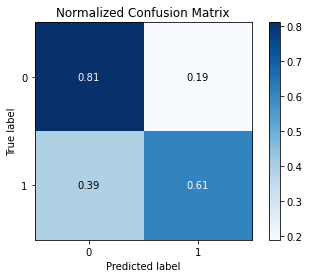

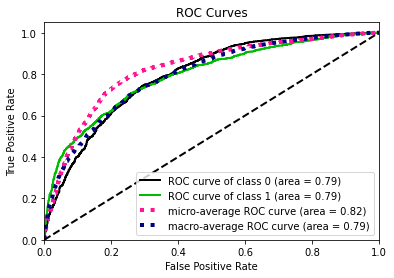

In [22]:
experimentar_normal(mlp_norm,X,y,oversampling=True)

# PCA

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4673
           1       0.49      0.59      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.772715,0.021009,0.704656,0.015773


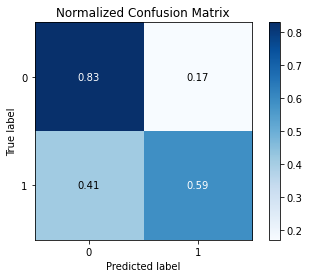

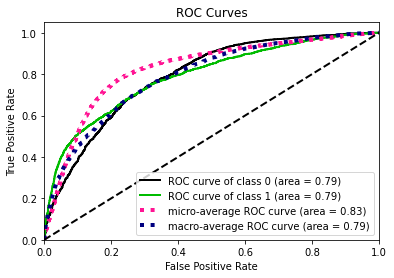

In [24]:
experimentar_pca(mlp_pca,X,y,oversampling=True)

# Feature selection

In [25]:
features=[0,5,6,7,8,9,10,11,12,13,14,15,17,18,21,22]

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4673
           1       0.50      0.58      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.771905,0.021529,0.704984,0.012478


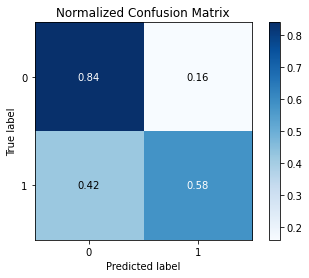

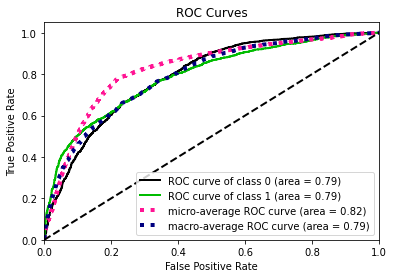

In [28]:
experimentar_feature_sel(mlp_feature,X,y,features,oversampling=True)